In [6]:
import PIL as pil
import numpy as np
import matplotlib.pyplot as plt
import  photutils as ph
from astropy.stats import sigma_clipped_stats
from astropy.stats import sigma_clip

Load the image from SDSS cutouts and convert the image to np array

In [7]:
#Open image and convert it to numpy array
img=pil.Image.open("/home/kevin/aufklarung_astro_station/project2/images/image_198.8863ra_3.5007681dec_GALAXY_591263790729816064specObjID_SDSS_dr18.jpg")
img_array=np.array(img)
img_array.shape
img_array=img_array[:,:,1]
#plt.imshow(img_array, vmax=np.max(img_array), vmin=np.min(img_array))

(<matplotlib.patches.PathPatch at 0x76b8081325d0>,)

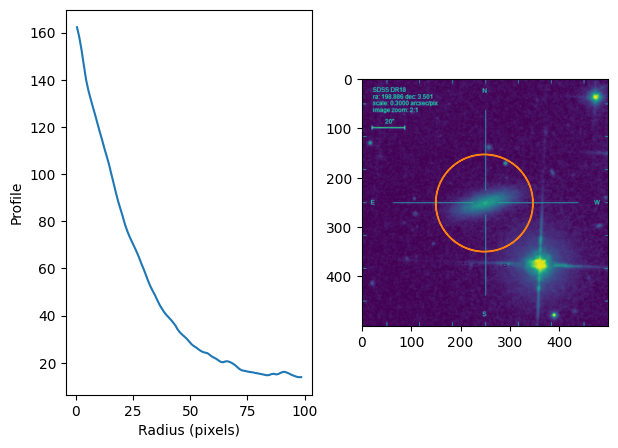

In [11]:
#Plot radial profile of light
xycen=ph.centroids.centroid_quadratic(img_array, xpeak=250, ypeak=250) #centers of galaxy/sources in pixels
from photutils.profiles import RadialProfile
#Diameter of galaxy in pixels
edge_radii = np.arange(100) 
rp = RadialProfile(img_array, xycen, edge_radii)

plt.figure(figsize=(7,5))
plt.subplot(1,2,1)
rp.plot(label='Radial Profile')
plt.subplot(1,2,2)
plt.imshow(img_array)
rp.apertures[98].plot(color='C1', lw=1)

(<matplotlib.patches.Ellipse at 0x76b809567470>,)

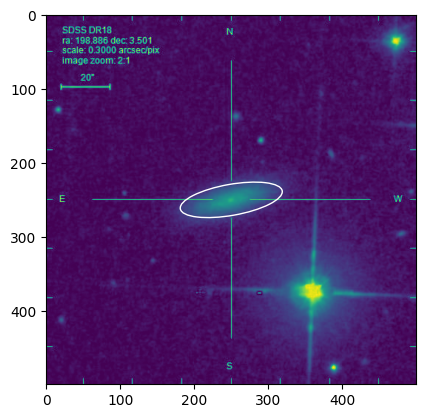

In [10]:
#Do fitting of isophotes on the image
from photutils.aperture import EllipticalAperture

from photutils.isophote import EllipseGeometry

#Define geometry of ellipse
geometry = EllipseGeometry(x0=250, y0=250, sma=70, eps=0.7,
                           pa=-10.0 * np.pi / 180.0)
#Put the ellipse in aperture
aper = EllipticalAperture((geometry.x0, geometry.y0), geometry.sma,
                          geometry.sma * (1 - geometry.eps),
                          geometry.pa)
plt.imshow(img_array)
aper.plot(color='white')

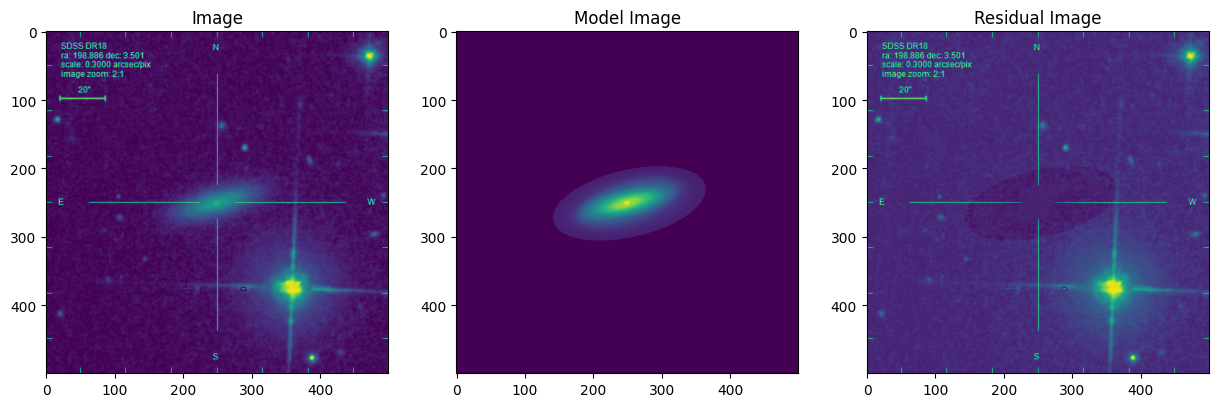

In [12]:
from photutils.isophote import Ellipse
from photutils.isophote import build_ellipse_model

#In the image array on galaxy fit a series of ellipses
ellipse = Ellipse(img_array, geometry)
isolist = ellipse.fit_image()

#Then extract the galaxy source as model
model_image = build_ellipse_model(img_array.shape, isolist)
#Extract the residual after galaxy sources has been removed
residual = img_array - model_image

plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.title("Image")
plt.imshow(img_array)
plt.subplot(1,3,2)
plt.title("Model Image")
plt.imshow(model_image)
plt.subplot(1,3,3)
plt.title("Residual Image")
plt.imshow(residual)